# Computer Vision

## Manipulating Images


### Load an Image


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  3  125k    3  4691    0     0   4412      0  0:00:29  0:00:01  0:00:28  4412
 75  125k   75 97477    0     0  56182      0  0:00:02  0:00:01  0:00:01 56182
100  125k  100  125k    0     0  67363      0  0:00:01  0:00:01 --:--:-- 67363


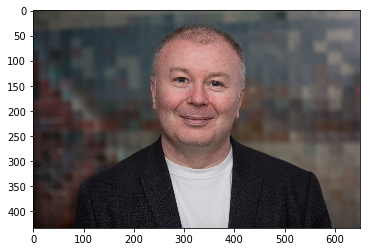

In [1]:
%matplotlib inline
from matplotlib.pyplot import imshow
from PIL import Image
import numpy as np
import skimage.color as sc

!curl https://raw.githubusercontent.com/MicrosoftLearning/AI-Introduction/master/files/graeme2.jpg -o img.jpg

i = np.array(Image.open('img.jpg'))
imshow(i)

### Examine Numerical Properties of the Image


In [3]:
type(i)

numpy.ndarray

In [4]:
i.dtype

dtype('uint8')

In [5]:
i.shape

(433, 650, 3)

(433, 650)

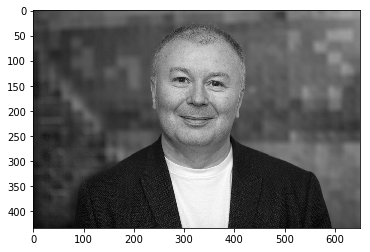

In [6]:
i_mono = sc.rgb2gray(i)
imshow(i_mono, cmap='gray')
i_mono.shape

### View Pixel Value Distributions
Plot a histogram

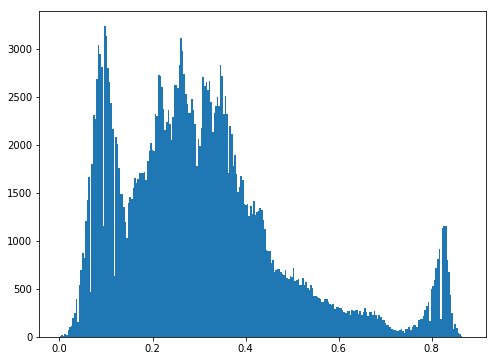

In [7]:
def im_hist(img):
    import matplotlib.pyplot as plt    
    fig = plt.figure(figsize=(8, 6))
    fig.clf()
    ax = fig.gca()    
    ax.hist(img.flatten(), bins = 256)
    plt.show()

im_hist(i_mono)

Plot a cumulative histogram

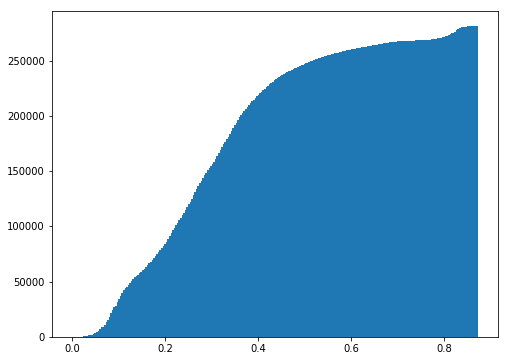

In [8]:
def im_cdf(img):
    import matplotlib.pyplot as plt    
    fig = plt.figure(figsize=(8, 6))
    fig.clf()
    ax = fig.gca()    
    ax.hist(img.flatten(), bins = 256, cumulative=True)
    plt.show()
    
im_cdf(i_mono)

### Equalize the Image
Use skimage library to equalize the image.  

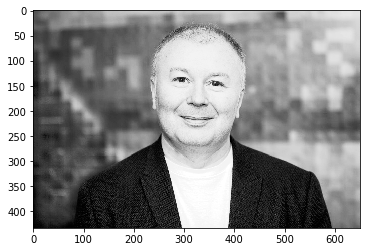

In [9]:
from skimage import exposure

i_eq = exposure.equalize_hist(i_mono)
imshow(i_eq, cmap='gray')

View the histogram and CDF plots:

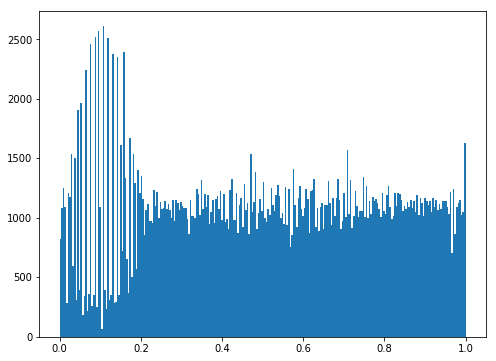

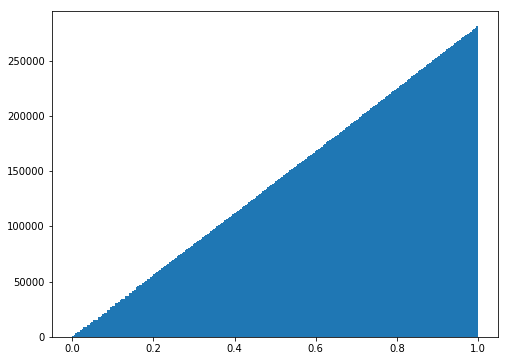

In [10]:
im_hist(i_eq)
im_cdf(i_eq)

## Denoising with Filters

### Add Noise

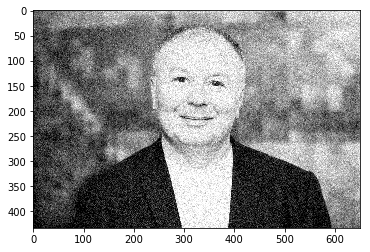

In [12]:
import skimage
i_n = skimage.util.random_noise(i_eq)
imshow(i_n, cmap="gray")

### Use a Gaussian Filter

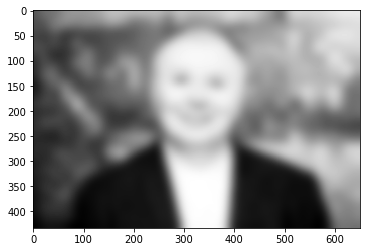

In [13]:
def gauss_filter(im, sigma = 10):
    from scipy.ndimage.filters import gaussian_filter as gf
    import numpy as np
    return gf(im, sigma = sigma)   
i_g = gauss_filter(i_n)
imshow(i_g, cmap="gray")

### Use a Median Filter


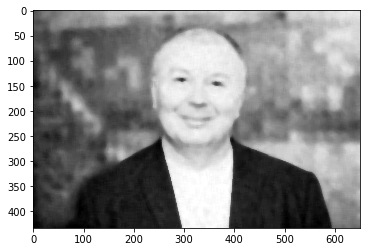

In [14]:
def med_filter(im, size = 10):
    from scipy.ndimage.filters import median_filter as mf
    import numpy as np
    return mf(im, size = size)     
i_m = med_filter(i_n)
imshow(i_m, cmap="gray")

### Extract Features

#### Sobel Edge Detection



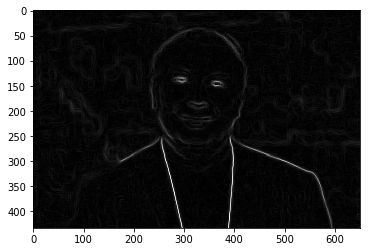

In [15]:
def edge_sobel(image):
    from scipy import ndimage
    import skimage.color as sc
    import numpy as np
    image = sc.rgb2gray(image) # Convert color image to gray scale
    dx = ndimage.sobel(image, 1)  # horizontal derivative
    dy = ndimage.sobel(image, 0)  # vertical derivative
    mag = np.hypot(dx, dy)  # magnitude
    mag *= 255.0 / np.amax(mag)  # normalize (Q&D)
    mag = mag.astype(np.uint8)
    return mag

i_edge = edge_sobel(i_m)
imshow(i_edge, cmap="gray")

#### Harris Corner Detection


'Done'

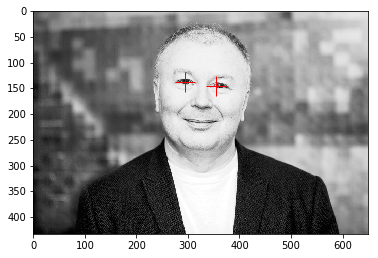

In [16]:
def corner_harr(im, min_distance = 10):
    from skimage.feature import corner_harris, corner_peaks
    mag = corner_harris(im)
    return corner_peaks(mag, min_distance = min_distance)

harris = corner_harr(i_eq, 10)


def plot_harris(im, harris, markersize = 20, color = 'red'):
    import matplotlib.pyplot as plt
    import numpy as np
    fig = plt.figure(figsize=(6, 6))
    fig.clf()
    ax = fig.gca()    
    ax.imshow(np.array(im).astype(float), cmap="gray")
    ax.plot(harris[:, 1], harris[:, 0], 'r+', color = color, markersize=markersize)
    return 'Done'  

plot_harris(i_eq, harris)

The corner detection algorithm has identified the eyes in the image.

## Image Classification

### Custom Vision API
https://www.customvision.ai/projects

In [21]:
%matplotlib inline
from matplotlib.pyplot import imshow
from PIL import Image
import requests
from io import BytesIO
import http.client, urllib.request, urllib.parse, urllib.error, base64, json

img_url = 'https://raw.githubusercontent.com/MicrosoftLearning/AI-Introduction/master/files/Vision/Test.jpg'

headers = {
    # Request headers
    'Content-Type': 'application/json',
    'Prediction-key': 'YOUR_KEY_HERE',
}

params = urllib.parse.urlencode({
})

body = "{'Url':'" + img_url + "'}"

try:
    # Get the predicted tags
    conn = http.client.HTTPSConnection('southcentralus.api.cognitive.microsoft.com')
    conn.request("POST", "/customvision/v1.1/Prediction/YOUR_ID_HERE/url?%s" % params, body, headers)
    response = conn.getresponse()
    data = response.read()
    strData = data.decode("UTF-8")
    parsed = json.loads(strData)
    
    # sort the tags by probability and get the highest one
    sorted_predictions = dict(parsed) 
    sorted_predictions['Predictions'] = sorted(parsed['Predictions'], key=lambda x : x['Probability'], reverse=True)
    print(sorted_predictions['Predictions'][0]['Tag'])
    conn.close()

    # Get the image and show it
    response = requests.get(img_url)
    img = Image.open(BytesIO(response.content))
    imshow(img)
except Exception as e:
    print("[Errno {0}] {1}".format(e.errno, e.strerror))
    

AttributeError: 'KeyError' object has no attribute 'errno'

## Use the Computer Vision API
https://portal.azure.com.



In [18]:
visionURI = 'REGION.api.cognitive.microsoft.com'
visionKey = 'YOUR_KEY_HERE'

### Get An Image from a URL


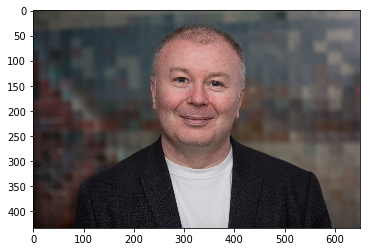

In [19]:
%matplotlib inline
from matplotlib.pyplot import imshow
from PIL import Image
import requests
from io import BytesIO

img_url = 'https://raw.githubusercontent.com/MicrosoftLearning/AI-Introduction/master/files/graeme2.jpg'

# Get the image and show it
response = requests.get(img_url)
img = Image.open(BytesIO(response.content))
imshow(img)


### Use the Computer Vision API to Get Image Features


In [20]:
def get_image_features(img_url):
    import http.client, urllib.request, urllib.parse, urllib.error, base64, json

    headers = {
        # Request headers.
        'Content-Type': 'application/json',
        'Ocp-Apim-Subscription-Key': visionKey,
    }

    params = urllib.parse.urlencode({
        # Request parameters. All of them are optional.
        'visualFeatures': 'Categories,Description,Color',
        'language': 'en',
    })

    body = "{'url':'" + img_url + "'}"

    try:
        # Execute the REST API call and get the response.
        conn = http.client.HTTPSConnection(visionURI)
        conn.request("POST", "/vision/v1.0/analyze?%s" % params, body, headers)
        response = conn.getresponse()
        data = response.read().decode("UTF-8")

        # 'data' contains the JSON response.
        parsed = json.loads(data)
        if response is not None:
            return parsed
        conn.close()


    except Exception as e:
        print('Error:')
        print(e)
        
jsonData = get_image_features(img_url)
desc = jsonData['description']['captions'][0]['text']
print(desc)

Error:
[Errno 11001] getaddrinfo failed


TypeError: 'NoneType' object is not subscriptable

Get the full response

In [22]:
# View the full details returned
import http.client, urllib.request, urllib.parse, urllib.error, base64, json
print (json.dumps(jsonData, sort_keys=True, indent=2))

null


Let's try with a different image:

In [23]:
img_url = 'https://raw.githubusercontent.com//MicrosoftLearning/AI-Introduction/master/files/uke.jpg'

# Get the image and show it
response = requests.get(img_url)
img = Image.open(BytesIO(response.content))
imshow(img)
jsonData = get_image_features(img_url)
desc = jsonData['description']['captions'][0]['text']
print(desc)

OSError: cannot identify image file <_io.BytesIO object at 0x0000022676562F68>

How about something a little more complex?

In [ ]:
img_url = 'https://raw.githubusercontent.com/MicrosoftLearning/AI-Introduction/master/files/soccer.jpg'

# Get the image and show it
response = requests.get(img_url)
img = Image.open(BytesIO(response.content))
imshow(img)
jsonData = get_image_features(img_url)
desc = jsonData['description']['captions'][0]['text']
print(desc)

## Using the Face API


### Create a Face API Service
https://portal.azure.com.


In [24]:
faceURI = "https://REGION.api.cognitive.microsoft.com/face/v1.0/"
faceKey = "YOUR_KEY_HERE"

Install the Face SDK package. This makes it easier to work with.


In [25]:
!pip install cognitive_face
!pip install pillow

Could not install packages due to an EnvironmentError: [WinError 5] 拒绝访问。: 'C:\\Program Files (x86)\\Microsoft Visual Studio\\Shared\\Anaconda3_64\\Lib\\site-packages\\cognitive_face'
Consider using the `--user` option or check the permissions.



Detect a face in an image:

In [26]:
%matplotlib inline
import requests
from io import BytesIO
from matplotlib.pyplot import imshow
from PIL import Image, ImageDraw
import cognitive_face as CF

# Set URI and Key
CF.Key.set(faceKey)
CF.BaseUrl.set(faceURI)

# Detect faces in an image
img_url = 'https://raw.githubusercontent.com/MicrosoftLearning/AI-Introduction/master/files/graeme1.jpg'
result = CF.face.detect(img_url)

# Get the ID of the first face detected
face1 = result[0]['faceId']
print ("Face 1:" + face1)

# Get the image
response = requests.get(img_url)
img = Image.open(BytesIO(response.content))

# Add rectangles for each face found
color="blue"
if result is not None:
    draw = ImageDraw.Draw(img) 
    for currFace in result:
        faceRectangle = currFace['faceRectangle']
        left = faceRectangle['left']
        top = faceRectangle['top']
        width = faceRectangle['width']
        height = faceRectangle['height']
        draw.line([(left,top),(left+width,top)],fill=color, width=5)
        draw.line([(left+width,top),(left+width,top+height)],fill=color , width=5)
        draw.line([(left+width,top+height),(left, top+height)],fill=color , width=5)
        draw.line([(left,top+height),(left, top)],fill=color , width=5)

# show the image
imshow(img)


ModuleNotFoundError: No module named 'cognitive_face'

Compare with another image

In [ ]:
# Get the image to compare
img2_url = 'https://raw.githubusercontent.com/MicrosoftLearning/AI-Introduction/master/files/graeme2.jpg'
response2 = requests.get(img2_url)
img2 = Image.open(BytesIO(response2.content))

# Detect faces in a comparison image
result2 = CF.face.detect(img2_url)

# Assume the first face is the one we want to compare
face2 = result2[0]['faceId']
print ("Face 2:" + face2)

def verify_face(face1, face2):
    # By default, assume the match is unverified
    verified = "Not Verified"
    color="red"

    if result2 is not None:
        # compare the comparison face to the original one we retrieved previously
        verify = CF.face.verify(face1, face2)

        # if there's a match, set verified and change color to green
        if verify['isIdentical'] == True:
            verified = "Verified"
            color="lightgreen"

        # Display the second face with a red rectange if unverified, or green if verified
        draw = ImageDraw.Draw(img2) 
        for currFace in result2:
            faceRectangle = currFace['faceRectangle']
            left = faceRectangle['left']
            top = faceRectangle['top']
            width = faceRectangle['width']
            height = faceRectangle['height']
            draw.line([(left,top),(left+width,top)] , fill=color, width=5)
            draw.line([(left+width,top),(left+width,top+height)] , fill=color, width=5)
            draw.line([(left+width,top+height),(left, top+height)] , fill=color, width=5)
            draw.line([(left,top+height),(left, top)] , fill=color, width=5)

    # show the image
    imshow(img2)

    # Display verification status and confidence level
    print(verified)
    print ("Confidence Level: " + str(verify['confidence']))

verify_face(face1, face2)

And another?

In [ ]:
# Get the image to compare
img2_url = 'https://raw.githubusercontent.com/MicrosoftLearning/AI-Introduction/master/files/graeme3.jpg'
response2 = requests.get(img2_url)
img2 = Image.open(BytesIO(response2.content))

# Detect faces in a comparison image
result2 = CF.face.detect(img2_url)

# Assume the first face is the one we want to compare
face2 = result2[0]['faceId']
print ("Face 2:" + face2)

verify_face(face1, face2)


And another?

In [ ]:
# Get the image to compare
img2_url = 'https://raw.githubusercontent.com/MicrosoftLearning/AI-Introduction/master/files/satya.jpg'
response2 = requests.get(img2_url)
img2 = Image.open(BytesIO(response2.content))

# Detect faces in a comparison image
result2 = CF.face.detect(img2_url)

# Assume the first face is the one we want to compare
face2 = result2[0]['faceId']
print ("Face 2:" + face2)

verify_face(face1, face2)


No match!